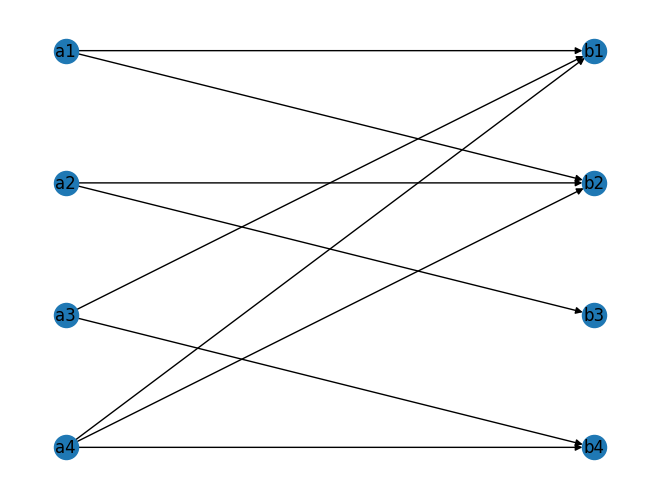

In [10]:
import networkx as nx

G = nx.DiGraph()
G.add_edges_from([('a1','b1'), ('a1','b2'), ('a2','b2'), ('a2','b3'), ('a3','b1'), ('a3','b4'), ('a4','b1'), ('a4','b2'), ('a4', 'b4')])

G_pos = nx.multipartite_layout(G, {1:['a4', 'a3', 'a2', 'a1'], 2:['b4', 'b3', 'b2', 'b1']})

nx.draw(G, G_pos, with_labels=True)

Introduce s and t node to assimilate it to a max-flow problem:

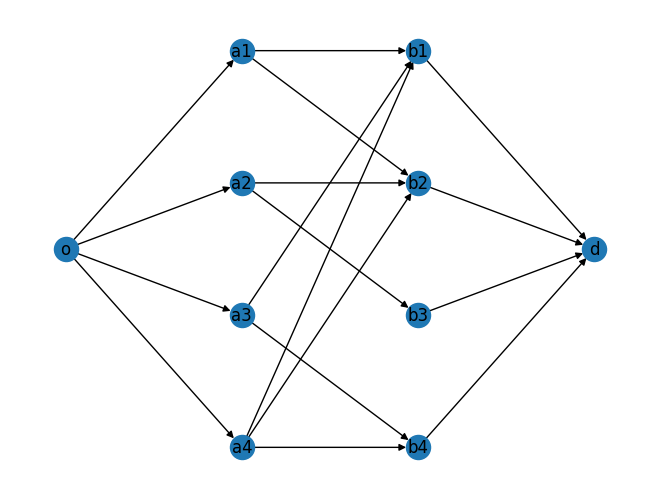

In [3]:
G.add_edges_from([('o','a1'), ('o','a2'), ('o','a3'), ('o','a4')])
G.add_edges_from([('b1', 'd'), ('b2', 'd'), ('b3', 'd'), ('b4', 'd')])
nx.set_edge_attributes(G, values = 1, name = 'capacity')

pos = nx.multipartite_layout(G, {0:['o'], 1:['a4', 'a3', 'a2', 'a1'], 2:['b4', 'b3', 'b2', 'b1'], 3:['d']})
nx.draw(G, pos, with_labels=True)

Run a max-flow algorithm to get the perfect match:

In [4]:
sol = nx.algorithms.flow.maximum_flow(G, _s='o', _t='d')
print(sol)

(4, {'a1': {'b1': 0, 'b2': 1}, 'b1': {'d': 1}, 'b2': {'d': 1}, 'a2': {'b2': 0, 'b3': 1}, 'b3': {'d': 1}, 'a3': {'b1': 1, 'b4': 0}, 'b4': {'d': 1}, 'a4': {'b1': 0, 'b2': 0, 'b4': 1}, 'o': {'a1': 1, 'a2': 1, 'a3': 1, 'a4': 1}, 'd': {}})


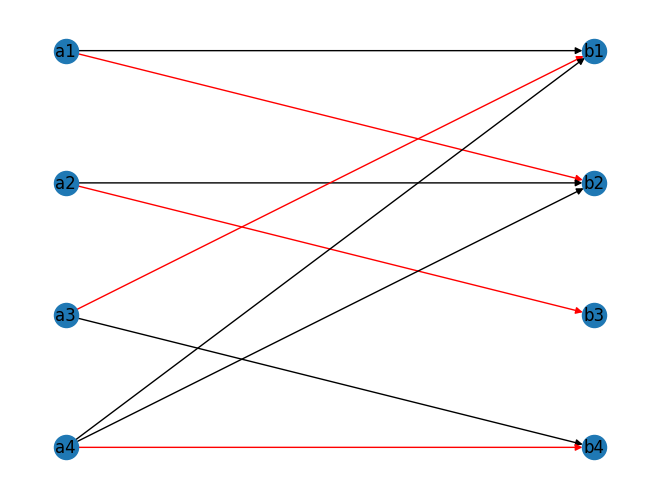

In [14]:
for e in G.edges:
    G.edges[e]['color'] = 'black'

G.edges['a1', 'b2']['color'] = 'r'
G.edges['a2', 'b3']['color'] = 'r'
G.edges['a3', 'b1']['color'] = 'r'
G.edges['a4', 'b4']['color'] = 'r'

col = nx.get_edge_attributes(G, 'color').values()
nx.draw(G, G_pos, with_labels=True, edge_color = col)

Food portions: (2, 3, 2, 2) => set capacity of edges from food to d accordingly, of edges from o to people to 4, leave other capacities at 1

In [6]:
G.edges['o','a1']['capacity'] = 4
G.edges['o','a2']['capacity'] = 4
G.edges['o','a3']['capacity'] = 4
G.edges['o','a4']['capacity'] = 4

G.edges['b1','d']['capacity'] = 2
G.edges['b2','d']['capacity'] = 3
G.edges['b3','d']['capacity'] = 2
G.edges['b4','d']['capacity'] = 2

sol = nx.algorithms.flow.maximum_flow(G, _s='o', _t='d')
print(sol)

(8, {'a1': {'b1': 0, 'b2': 1}, 'b1': {'d': 2}, 'b2': {'d': 3}, 'a2': {'b2': 1, 'b3': 1}, 'b3': {'d': 1}, 'a3': {'b1': 1, 'b4': 1}, 'b4': {'d': 2}, 'a4': {'b1': 1, 'b2': 1, 'b4': 1}, 'o': {'a1': 1, 'a2': 2, 'a3': 2, 'a4': 3}, 'd': {}})


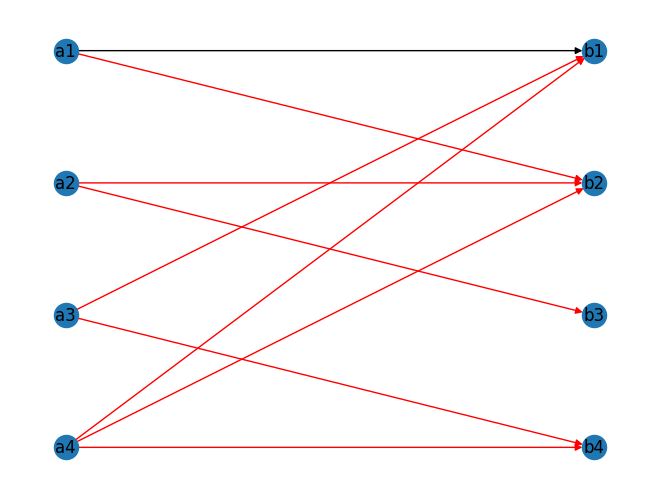

In [13]:
for e in G.edges:
    G.edges[e]['color'] = 'black'

G.edges['a1', 'b2']['color'] = 'r'
G.edges['a2', 'b3']['color'] = 'r'
G.edges['a2', 'b2']['color'] = 'r'
G.edges['a3', 'b1']['color'] = 'r'
G.edges['a3', 'b4']['color'] = 'r'
G.edges['a4', 'b4']['color'] = 'r'
G.edges['a4', 'b2']['color'] = 'r'
G.edges['a4', 'b1']['color'] = 'r'

col = nx.get_edge_attributes(G, 'color').values()
nx.draw(G, G_pos, with_labels=True, edge_color = col)

people want food in amounts (3, 2, 2, 2) => set capacity of edges o-ai accordingly, ai-bj to Inf:

In [8]:
G.edges['o','a1']['capacity'] = 3
G.edges['o','a2']['capacity'] = 2
G.edges['o','a3']['capacity'] = 2
G.edges['o','a4']['capacity'] = 2

G.edges['a1', 'b1']['capacity'] = float('Inf')
G.edges['a1', 'b2']['capacity'] = float('Inf')
G.edges['a2', 'b2']['capacity'] = float('Inf')
G.edges['a2', 'b3']['capacity'] = float('Inf')
G.edges['a3', 'b1']['capacity'] = float('Inf')
G.edges['a3', 'b4']['capacity'] = float('Inf')
G.edges['a4', 'b1']['capacity'] = float('Inf')
G.edges['a4', 'b2']['capacity'] = float('Inf')
G.edges['a4', 'b4']['capacity'] = float('Inf')

sol = nx.algorithms.flow.maximum_flow(G, _s='o', _t='d')
print(sol)

(9, {'a1': {'b1': 0, 'b2': 3}, 'b1': {'d': 2}, 'b2': {'d': 3}, 'a2': {'b2': 0, 'b3': 2}, 'b3': {'d': 2}, 'a3': {'b1': 2, 'b4': 0}, 'b4': {'d': 2}, 'a4': {'b1': 0, 'b2': 0, 'b4': 2}, 'o': {'a1': 3, 'a2': 2, 'a3': 2, 'a4': 2}, 'd': {}})


{('a1', 'b2'): Text(4.098614833081271e-06, 0.6666625680518337, '3'),
 ('a2', 'b3'): Text(4.098614833081271e-06, -4.0986148328592265e-06, '2'),
 ('a3', 'b1'): Text(-3.7258529724804035e-06, 0.3333258816273883, '2'),
 ('a4', 'b4'): Text(4.388062128157788e-06, -1.0, '2')}

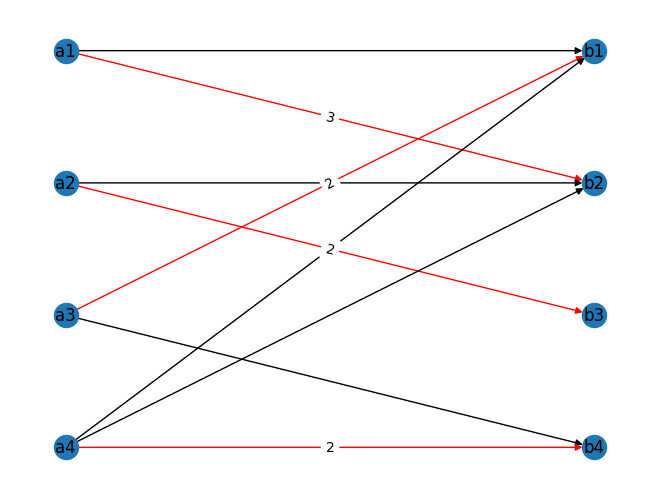

In [11]:
for e in G.edges:
    G.edges[e]['color'] = 'black'

labels = {}
G.edges['a1', 'b2']['color'] = 'r'
labels[('a1', 'b2')] = 3
G.edges['a2', 'b3']['color'] = 'r'
labels[('a2', 'b3')] = 2
G.edges['a3', 'b1']['color'] = 'r'
labels[('a3', 'b1')] = 2
G.edges['a4', 'b4']['color'] = 'r'
labels[('a4', 'b4')] = 2

col = nx.get_edge_attributes(G, 'color').values()
nx.draw(G, G_pos, with_labels=True, edge_color = col)
nx.draw_networkx_edge_labels(G, G_pos, edge_labels=labels)